# Question 1

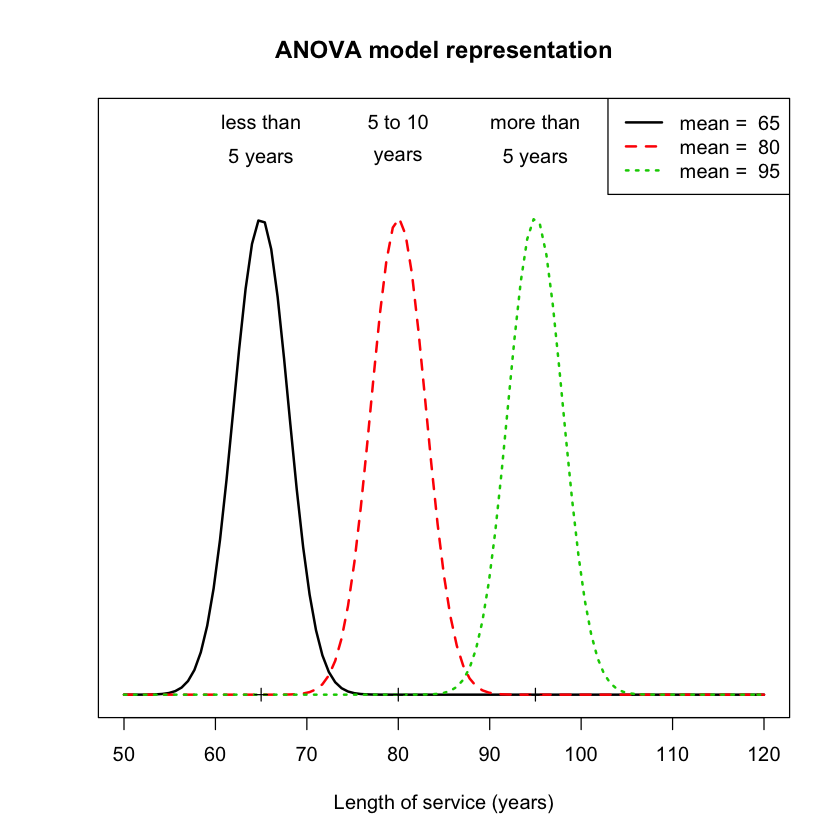

In [4]:
means = c(65,80,95)
sd=3
plot(c(50,120), c(0,.16), type="n", main = "ANOVA model representation",
xlab="Length of service (years)", ylab="", yaxt="n")
for(i in 1:3){
curve(dnorm(x, mean=means[i], sd=sd), 50, 120, add=TRUE, lwd=2, col=i, lty=i)
}
points(means,rep(0,3),pch=3)
text1 = c("less than", "5 to 10", "more than")
text2 = c("5 years", "years", "5 years")
text(means, rep(0.16,3), label=text1)
text(means, rep(0.15,3), label=text2)
legend("topright",legend=paste("mean = ",means),lwd=2,col=1:3,lty=1:3)

(b) E(MST R) = 9 + (25)(450)/2 = 5634, E(MSE) = 9.

Yes, E(MST R) is larger than E(MSE). It implies a large F∗.

# Question 2

In [11]:
d = read.table('./therapy.txt');

In [39]:
colnames(d) = c('Age', 'Fitness', 'Recovery');
d;

Age,Fitness,Recovery
29,1,1
42,1,2
38,1,3
40,1,4
43,1,5
40,1,6
30,1,7
42,1,8
30,2,1
35,2,2


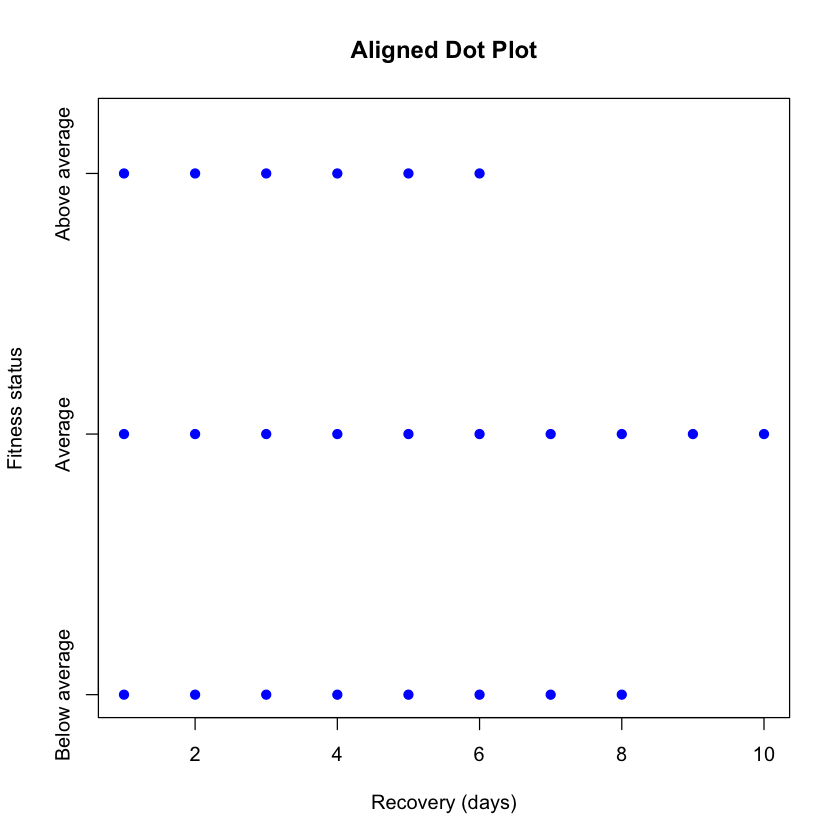

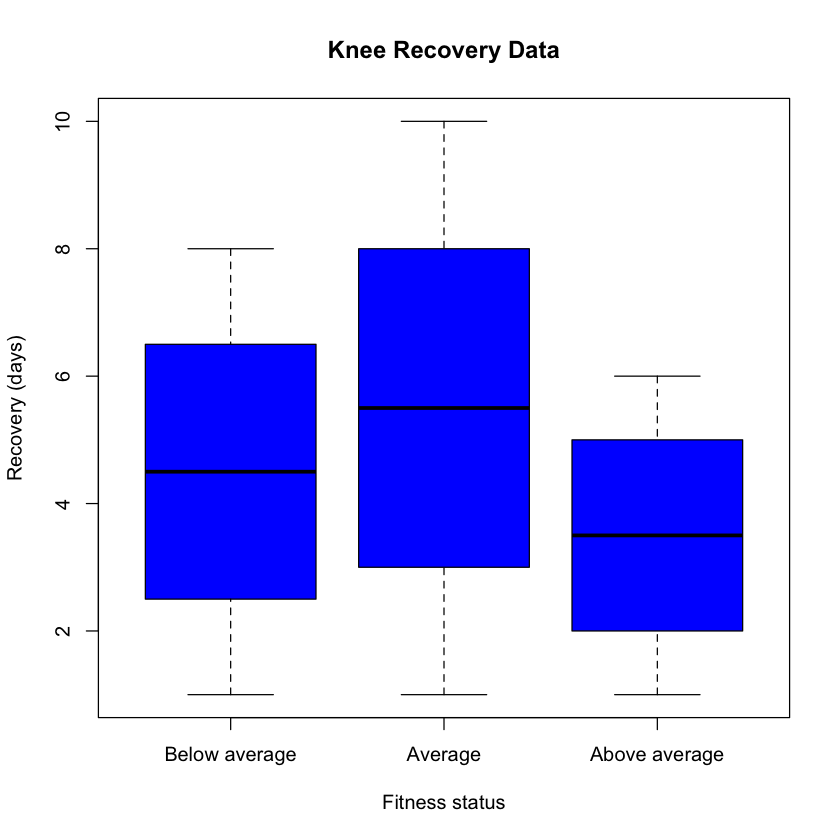

In [40]:
# plot empty dot-plot
plot(d$Recovery, d$Fitness,
main="Aligned Dot Plot", ylab="Fitness status", xlab="Recovery (days)",
type="n", yaxt="n", ylim=c(1,3.2))
axis(2, at=1:3, labels=c("Below average","Average","Above average"))

# add points to the dot-plot
for(i in 1:3){
id = which(d$Fitness==i)
table(d$Recovery[id]) # Note, each observation is repeated no more than 2 times
id2 = which(table(d$Recovery[id])>1)
points(d$Recovery[id], d$Fitness[id], pch=19, col="blue")
points(d$Recovery[id[id2]], as.numeric(d$Fitness[id[id2]]) + 0.1, pch=19, col="blue")
}

# plot the data
plot(d$Recovery  ~ d$Fitness, main="Knee Recovery Data", xlab="Fitness status", ylab="Recovery (days)", pch=19, col="blue", xaxt="n")
axis(1, at=1:3, labels=c("Below average","Average","Above average"))


In [37]:
# estimate means
by(d$Recovery,d$Fitness,mean)
mean(d$Recovery)

d$Fitness: 1
[1] 4.5
------------------------------------------------------------ 
d$Fitness: 2
[1] 5.5
------------------------------------------------------------ 
d$Fitness: 3
[1] 3.5

[1] 4.666667

In [36]:
# fit ANOVA model
d$Fitness=factor(d$Fitness)
aov(Recovery~Fitness, data=d)

Call:
   aov(formula = Recovery ~ Fitness, data = d)

Terms:
                  Fitness Residuals
Sum of Squares   15.33333 142.00000
Deg. of Freedom         2        21

Residual standard error: 2.600366
Estimated effects may be unbalanced

In [38]:
# Confidence interval of the difference
means=by(d$Recovery,d$Fitness,mean)
means[1]-means[3] + c(-1,1)*qt(.975,21) * sqrt(19.8*(1/8 + 1/6))

[1] -3.997568  5.997568

# Question 3

In [41]:
colors = read.table('./colors.txt');

In [42]:
colors

V1,V2,V3
28,1,1
26,1,2
31,1,3
27,1,4
35,1,5
34,2,1
29,2,2
25,2,3
31,2,4
29,2,5


In [43]:
colnames(colors) = c('Response', 'Color', 'Parking');
colors;

Response,Color,Parking
28,1,1
26,1,2
31,1,3
27,1,4
35,1,5
34,2,1
29,2,2
25,2,3
31,2,4
29,2,5


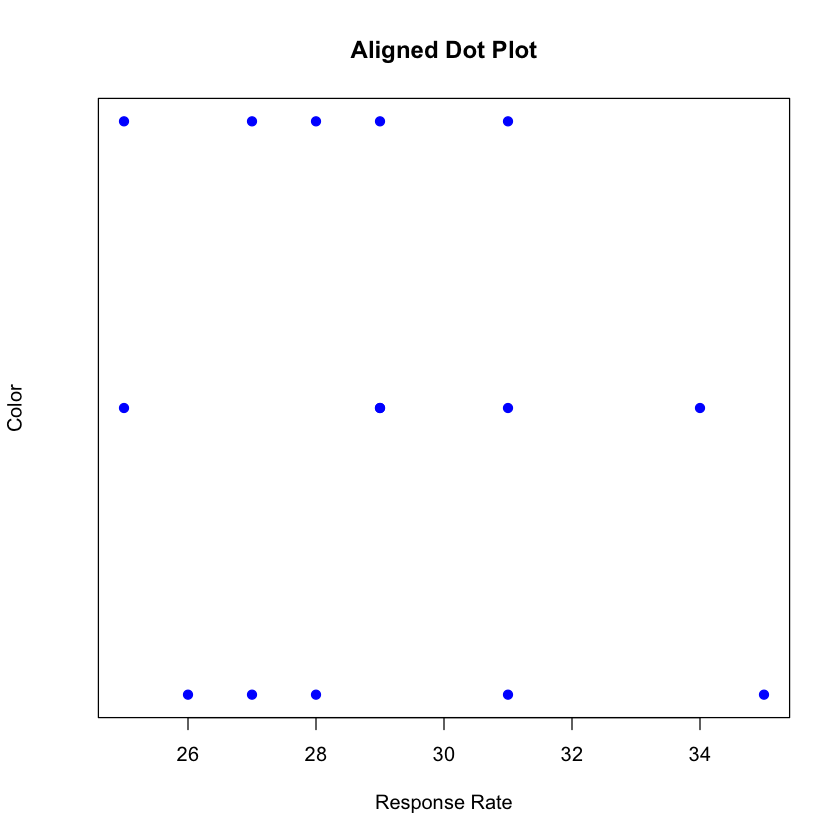

In [47]:
# plot empty dot-plot
plot(colors$Response, colors$Color,
main="Aligned Dot Plot", ylab="Color", xlab="Response Rate",
type="n", yaxt="n")
# axis(2, at=1:3, labels=c("Below average","Average","Above average"))

# add points to the dot-plot
for(i in 1:3){
id = which(colors$Color==i)
table(colors$Response[id]) # Note, each observation is repeated no more than 2 times
id2 = which(table(colors$Response[id])>1)
points(colors$Response[id], colors$Color[id], pch=19, col="blue")
points(colors$Response[id[id2]], as.numeric(colors$Response[id[id2]]) + 0.1, pch=19, col="blue")
}

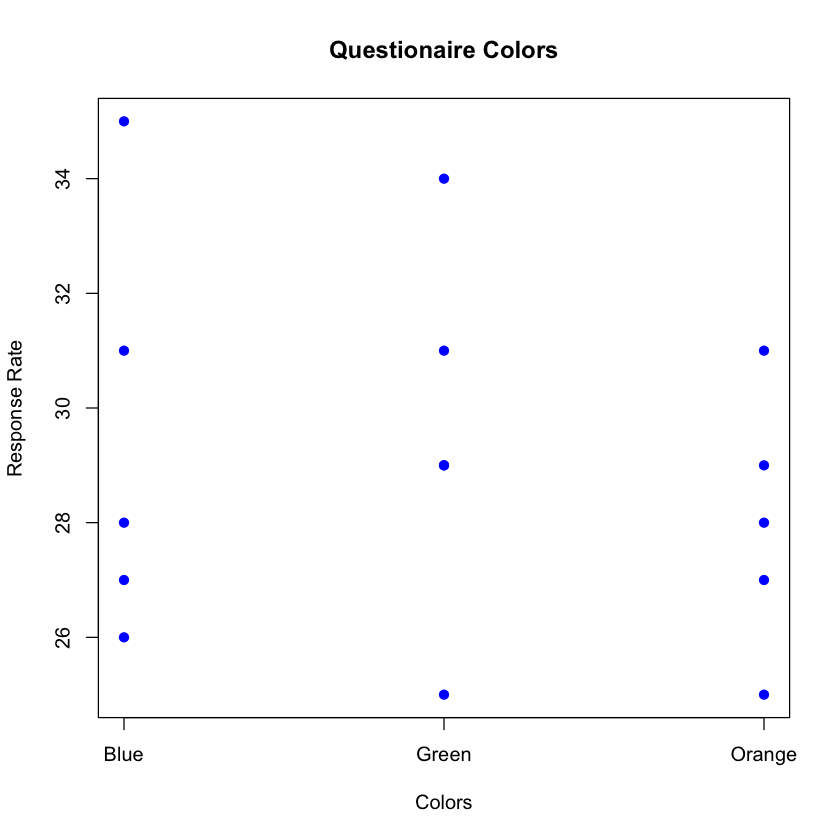

In [48]:
# plot the data
plot(colors$Response  ~ colors$Color, main='Questionaire Colors', xlab="Colors", ylab="Response Rate", pch=19, col="blue", xaxt="n")
axis(1, at=1:3, labels=c("Blue","Green","Orange"))